In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

After Importing what I need, Ive got to load my file in as a dataframe.  Then I want to see the basic info on it, how many columns, data types, rows, etc.
Then I want to check the quality of data in my not integer value columns, by printing out all of the unique observations found. This will tell me if there are variations in the input, such as the case or spacing, that need to be addressed before attempting to group data.

In [2]:
student_perf = pd.read_csv('..\data\StudentsPerformance.csv')
student_perf.info()
print(student_perf['gender'].unique())
print(student_perf['test preparation course'].unique())
print(student_perf['lunch'].unique())
print(student_perf['parental level of education'].unique())
print(student_perf['race/ethnicity'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
['female' 'male']
['none' 'completed']
['standard' 'free/reduced']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['group B' 'group C' 'group A' 'group D' 'group E']


Now, I want to check if there are any values out of range, in this case below zero or above 100.
I also want to see if there are any scores missing.

In [3]:
print(student_perf['math score'].min(), student_perf['math score'].max())
print(student_perf['reading score'].min(), student_perf['reading score'].max())
print(student_perf['writing score'].min(), student_perf['writing score'].max())
print(student_perf['math score'].isna().sum())
print(student_perf['reading score'].isna().sum())
print(student_perf['writing score'].isna().sum())
student_perf[student_perf['math score'] < 10]['math score'].value_counts()

0 100
17 100
10 100
0
0
0


8    1
0    1
Name: math score, dtype: int64

Next, I want to take the average value of the 3 test scores for each student #, and use it to create an overall test score column.  For now, I am not going to focus on the achievement by subject, just overall achievement.  
After making the new column, i just want to make sure the values are as expected.  I sorted the values to check for any outliers, and to get an idea of the data for students at both ends of the range.

In [4]:
student_perf['avg_test_score'] = (student_perf['math score'] + student_perf['reading score'] + student_perf['writing score']) / 3
print(student_perf['avg_test_score'].mean())
sorted_avg_score = student_perf['avg_test_score'].sort_values(ascending = False)
print(sorted_avg_score.tail())
sorted_avg_score.head()


67.77066666666664
76     26.000000
327    23.333333
596    23.000000
980    18.333333
59      9.000000
Name: avg_test_score, dtype: float64


962    100.000000
916    100.000000
458    100.000000
114     99.666667
179     99.000000
Name: avg_test_score, dtype: float64

Now, I believe my data is ready to be subsetted in to my different groupings based on each variable, allowing me to make the correct calculations needed in order to identify the strongest correlations.  I will start by dividing the students in to 2 groups based on the 2 options under the lunch variable, and comparing the average scores.  From there, I will move on to the other attributes.

In [5]:
free_reduced = student_perf[student_perf.lunch == 'free/reduced']
not_free = student_perf[student_perf.lunch != 'free/reduced']
print(free_reduced['avg_test_score'].mean())
print(not_free['avg_test_score'].mean())
print(free_reduced['avg_test_score'].min())
print(not_free['avg_test_score'].min())
print(free_reduced['avg_test_score'].max())


62.199061032863845
70.83720930232563
9.0
26.0
97.66666666666667


# EXPLORATORY DATA ANALYSIS

The first thing I want to take another look at for data analysis is the 3 test scores, and how they correlate with one another.  The strength of correlation may help decide if it is necessary to analyze performance for each test individually, or to simply work with the overall averages.  There also may be a specifically strong correlation, such as between reading and writing, that may allow me to combine their scores in to 1.

In [6]:
#creating new database of just the 3 test scores
test_grades = student_perf[['math score','reading score','writing score']]
tg_corr = test_grades.corr()
print(tg_corr)

               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


There is a fairly strong correlation between all scores, but there is an extremely high correlation of over .95 between reading and writing scores.  Because of this, I will combine those 2 scores for plotting purposes in to a reading/writing score column.

In [7]:
student_perf['r/w score'] = (student_perf['reading score'] + student_perf['writing score'])/2

The first thing I want to look at is the breakdown of scores between for my 4 most important features; whether a student has taken the test prep, whether a student qualifies for free/reduced lunch(families in the lower income brackets qualify for free/reduced lunch), the parent of the student's educational level, as well as which race/ethnicity category the student falls in to.  I also have a classification on gender, however at this point, I am more interested in the determinant characteristics of the 4 features listed above.

In [8]:
#Starting with whether a student qualifies for free/reduced lunch, first I want to see how large a sample I have for each 
#category, and then look at the means for each subset:

lunch_scores = student_perf[['lunch', 'math score', 'r/w score']]
not_free = student_perf[student_perf['lunch'] == 'standard']
free_reduced = student_perf[student_perf['lunch'] == 'free/reduced']
print('The # of students on standard lunch:', len(not_free))
print('The # of students on free/reduced lunch:', len(free_reduced))


The # of students on standard lunch: 645
The # of students on free/reduced lunch: 355


In [9]:
print('The mean math score of those on standard lunch is:', round(np.mean(not_free['math score']), 2))
print('The mean math score of those on free/reduced lunch is:', round(np.mean(free_reduced['math score']), 2))
print('The mean reading/writing score of those on standard lunch is:', round(np.mean(not_free['r/w score']), 2))
print('The mean reading/writing score of those on free/reduced lunch is:', round(np.mean(free_reduced['r/w score']), 2))

The mean math score of those on standard lunch is: 70.03
The mean math score of those on free/reduced lunch is: 58.92
The mean reading/writing score of those on standard lunch is: 71.24
The mean reading/writing score of those on free/reduced lunch is: 63.84


There's an over 11 point difference in the mean of the math scores, and around a 7.5 difference in the mean of the reading/writing scores between standard and free/reduced lunch students. The next step is to take a closer look at the overall range and distribution of the scores within these 2 categories.

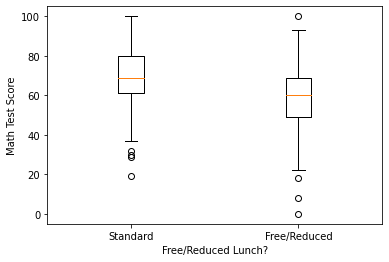

In [10]:
_ = plt.boxplot([not_free['math score'], free_reduced['math score']])
_ = plt.xlabel('Free/Reduced Lunch?')
_ = plt.ylabel('Math Test Score')
_ = plt.xticks([1, 2], ['Standard', 'Free/Reduced']) 
plt.show()


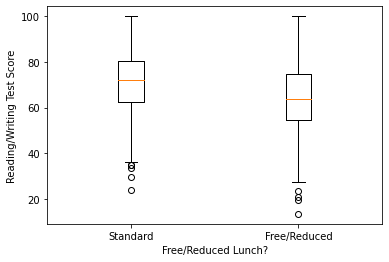

In [11]:
_ = plt.boxplot([not_free['r/w score'], free_reduced['r/w score']])
_ = plt.xlabel('Free/Reduced Lunch?')
_ = plt.ylabel('Reading/Writing Test Score')
_ = plt.xticks([1, 2], ['Standard', 'Free/Reduced'])
plt.show()

There's a clear difference between the performance of those who qualify for free/reduced lunch and those who don't, which is unsurprising.  While free/reduced lunch seems to be a variable that drives test scores, qualifying for free/reduced lunch is often a variable driven by another variable, parental education level.  Next, I want to see just how closely correlated parental education level is to whether one qualifies for free/reduced lunch.
I want to do this by looking at each of the subsets for parental education level to determine how many within that subset also qualify for free/reduced lunch. 

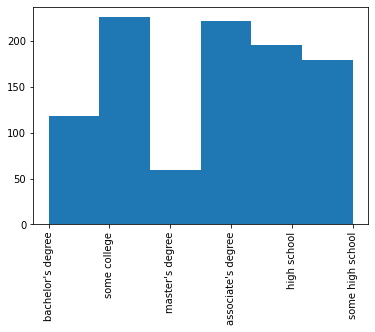

In [12]:
#Subsetting the 'parental level of education'
master = student_perf[student_perf['parental level of education']=="master's degree"]
bachelor = student_perf[student_perf['parental level of education']=="bachelor's degree"]
assoc = student_perf[student_perf['parental level of education']=="associate's degree"]
some_coll = student_perf[student_perf['parental level of education']=='some college']
high_only = student_perf[student_perf['parental level of education']=='high school']
some_high = student_perf[student_perf['parental level of education']=='some high school']

plt.hist(student_perf['parental level of education'], bins=6)
plt.xticks(rotation=90)
plt.show()

#I want to order these by ascending level of education, but have not figured out how to do that yet.

The Distribution of the parental level of education column shows over 80% of our student's fall in to the 4 categories within associate's degree and below. 
What I am most interested in is how much the free/reduced lunch category is determined by parental education level, to see if free/reduced lunch is simply a product of education level in this dataset.

In [13]:
print((np.sum(master.lunch=='standard'))/(np.sum(len(master))))
print((np.sum(some_high.lunch=='standard'))/(np.sum(len(some_high))))

0.5932203389830508
0.659217877094972


Just by looking at the highest and lowest education levels, there appears to be no relationship between parental level of education and the family income level(which is used to determine free/reduced lunch) in this dataset.
That is counter to what the vast majority of previous research in the field shows, but for the sake of the project, I will stick to the information in this dataset and assume there is no correlation here.  Knowing that these are completely independent variables in the dataset, I'll go on to look at the test scores by education level.

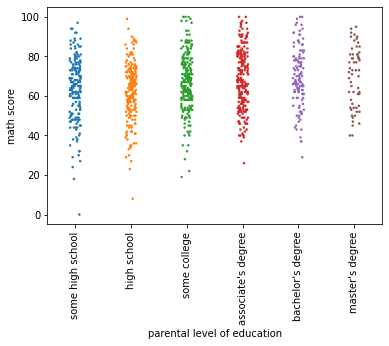

In [14]:
ed_list = ['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]
sns.stripplot(x='parental level of education', y='math score', data=student_perf, marker='.', order=ed_list)
plt.xticks(rotation=90)
plt.show()

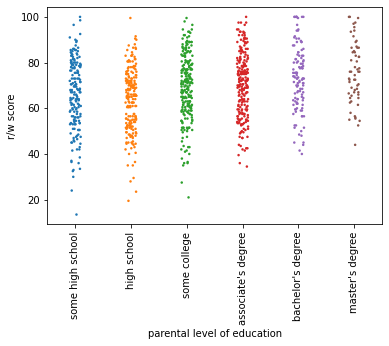

In [15]:
sns.stripplot(x='parental level of education', y='r/w score', data=student_perf, marker='.', order=ed_list)
plt.xticks(rotation=90)
plt.show()

There does appear to be a slight, but clear movement towards higher scores among the higher education levels, especially in the reading/writing scores.  It seems that high scores in both areas can come from any category of parental education level, but with lower levels of parental level of education, there's a wider range of scores and a number of scores well below the minimums of other groups in the higher education levels. 

In [16]:
print(round(np.mean(some_high['r/w score']), 2))
print(round(np.mean(high_only['r/w score']), 2))
print(round(np.mean(some_coll['r/w score']), 2))
print(round(np.mean(assoc['r/w score']), 2))
print(round(np.mean(bachelor['r/w score']), 2))
print(round(np.mean(master['r/w score']), 2))

65.91
63.58
69.15
70.41
73.19
75.53


In [17]:
print(round(np.mean(some_high['math score']), 2))
print(round(np.mean(high_only['math score']), 2))
print(round(np.mean(some_coll['math score']), 2))
print(round(np.mean(assoc['math score']), 2))
print(round(np.mean(bachelor['math score']), 2))
print(round(np.mean(master['math score']), 2))

63.5
62.14
67.13
67.88
69.39
69.75


Outside of the lowest 2 levels, there does appear to be a gradual increase in the mean as the parental education level, 
but there are larger increase in both sets from the 2nd to the 3rd levels, and from the 4th to the 5th levels. It may be 
worth in combining some of our levels, creating 3 total categories; high school and below, some college/associates, and 
bachelor's/master's for further analysis.  However, either way, we can see a positive correlation here between higher parental levels of education and higher scores.  This time, Reading and writing scores show the larger disparities.

The next category to look at is whether a student took completed the test preparation course.

In [18]:
prepped = student_perf[student_perf['test preparation course']=='completed']
no_prep = student_perf[student_perf['test preparation course']!='completed']

print('There are', len(prepped), 'students that took the test prep.', len(no_prep), 'did not.')
print('The mean math score for students who took the prep course:', np.mean(prepped['math score']))
print('The mean math score for students who did NOT take the prep course:', np.mean(no_prep['math score']))

print('The mean reading/writing score for students who took the prep course:', np.mean(prepped['r/w score']))
print('The mean reading/writing score for students who did NOT take the prep course:', np.mean(no_prep['r/w score']))

There are 358 students that took the test prep. 642 did not.
The mean math score for students who took the prep course: 69.69553072625699
The mean math score for students who did NOT take the prep course: 64.0778816199377
The mean reading/writing score for students who took the prep course: 74.15642458100558
The mean reading/writing score for students who did NOT take the prep course: 65.51947040498442


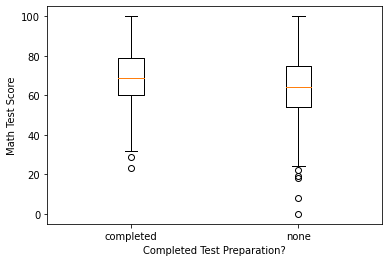

In [19]:
_ = plt.boxplot([prepped['math score'], no_prep['math score']])
_ = plt.xlabel('Completed Test Preparation?')
_ = plt.ylabel('Math Test Score')
_ = plt.xticks([1, 2], ['completed', 'none'])
plt.show()

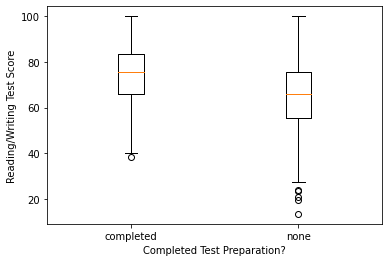

In [20]:
_ = plt.boxplot([prepped['r/w score'], no_prep['r/w score']])
_ = plt.xlabel('Completed Test Preparation?')
_ = plt.ylabel('Reading/Writing Test Score')
_ = plt.xticks([1, 2], ['completed', 'none'])
plt.show()

It's clear that test prep helped, although it wasnt a guarantee of test success. Those who took test_prep scored 5.5 points on average higher on the math test, and 8.5 points on average higher for the reading and writing tests.
Like with the free and reduced lunch category, however, whether a student took the test prep course may be a product of another category. 

In [21]:
print((np.sum(prepped['lunch']=='standard'))/len(prepped))
print((np.sum(student_perf['lunch']=='standard'))/len(student_perf))

0.6340782122905028
0.645


In [22]:
print((np.sum(free_reduced['test preparation course']=='completed'))/len(free_reduced))
print((np.sum(not_free['test preparation course']=='completed'))/len(not_free))

0.36901408450704226
0.351937984496124


The Percentages both ways appear to be extremely similar.  It doesnt appear students were more likely to take the test prep based on whether or not they receive free or reduced lunch, which is determined by family income.

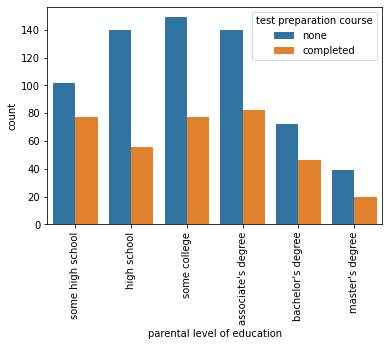

In [23]:
sns.countplot(x=student_perf['parental level of education'], hue=student_perf['test preparation course'], order=ed_list)
plt.xticks(rotation=90)
plt.show()

There is some slight variation, but among all parental education levels, more students did NOT complete the test prep course than did.  Of all the education levels, those on the lowest level (some high school) were actually more likely in our sample to take the prep course than any other group.  This may explain why the average test scores were actually higher among students with parents that had some high school than for students with parents that finished high school, but went no further.

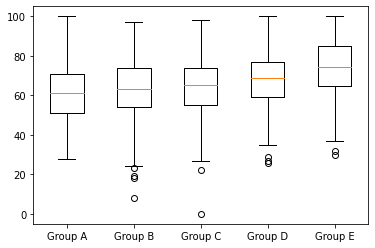

In [24]:
group_A = student_perf[student_perf['race/ethnicity']=='group A']
group_B = student_perf[student_perf['race/ethnicity']=='group B']
group_C = student_perf[student_perf['race/ethnicity']=='group C']
group_D = student_perf[student_perf['race/ethnicity']=='group D']
group_E = student_perf[student_perf['race/ethnicity']=='group E']

_ = plt.boxplot([group_A['math score'], group_B['math score'], group_C['math score'], group_D['math score'], 
                 group_E['math score']])
_ = plt.xticks([1, 2, 3, 4, 5], ['Group A', 'Group B', 'Group C', 'Group D', 'Group E'])
plt.show()

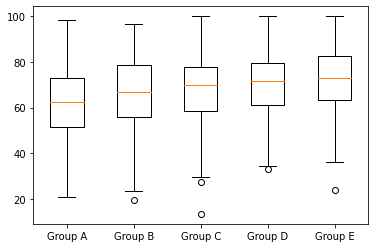

In [25]:
_ = plt.boxplot([group_A['r/w score'], group_B['r/w score'], group_C['r/w score'], group_D['r/w score'], group_E['r/w score']])
_ = plt.xticks([1, 2, 3, 4, 5], ['Group A', 'Group B', 'Group C', 'Group D', 'Group E'])
plt.show()

In [26]:
# finally, just a quick look at how much we should consider gender.

males = student_perf[student_perf['gender'] == 'male']
females = student_perf[student_perf['gender'] == 'female']
print('The average math score for males:', males['math score'].mean())
print('The average math score for females:', females['math score'].mean())

males = student_perf[student_perf['gender'] == 'male']
females = student_perf[student_perf['gender'] == 'female']
print('The average r/w score for males:', males['r/w score'].mean())
print('The average r/w score for females: ', females['r/w score'].mean())

The average math score for males: 68.72821576763485
The average math score for females: 63.633204633204635
The average r/w score for males: 64.39211618257261
The average r/w score for females:  72.5376447876448


Interestingly, males did better on the math section, while females performed better on the reading and writing parts.  And the differences in mean are large enough to show that there likely is a trend here, as opposed to a random occurence.

# Conclusion - EDA

It seems that all 5 of our features each have an affect on scores for both math and reading/writing. The strongest correlation in scores of our first 3 categories appears to be whether a student qualifies for free and reduced lunch. According to the data, those students who do qualify, and thus are on or below the poverty line, are likely to score almost a whole letter grade lower in math, and more than one full letter grade lower in reading/writing.
At the same time, there was also a similar significance in the level of parental education, with students of parents with higher education levels scoring higher than their counterparts.  This however, did not seem as strong as the free and reduced lunch qualifier. I also found that the test preparation course bumped up scores for all categories, particularly when it came to the reading and writing tests.  
Lastly, there was also a gradual increase in mean performance moving through the racial categories, starting on A and ending on E, with Group E outperforming Group A by a full letter grade and a half. This proved the largest disparity between groups in any of the 4 categories analyzed.

# Pre-processing and Training Data Development

Next steps include getting dummy variables of our categorical data, Scaling the data, and creating our training and testing splits for modelling.

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
dum_lunch = pd.get_dummies(student_perf['lunch'], drop_first=True)
dum_lunch.head()

,standard
0,1
1,1
2,1
3,0
4,1


In [29]:
dum_prep = pd.get_dummies(student_perf['test preparation course'], drop_first=True)
dum_prep.head()

,none
0,1
1,0
2,1
3,1
4,1


In [30]:

parent_ed_map = {"master's degree": 5, "bachelor's degree": 4, "associate's degree": 3, "some college": 2, "high school": 1, "some high school": 0}
parent_educ_ord = student_perf['parental level of education'].map(parent_ed_map)
parent_educ_ord



0      4
1      2
2      5
3      3
4      2
      ..
995    5
996    1
997    1
998    2
999    2
Name: parental level of education, Length: 1000, dtype: int64

In [31]:
dum_ethnic = pd.get_dummies(student_perf['race/ethnicity'], drop_first=True)
dum_ethnic.head()

,group B,group C,group D,group E
0,1,0,0,0
1,0,1,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [32]:
dum_gender = pd.get_dummies(student_perf['gender'], drop_first=True)

In [33]:
dummies = pd.concat([dum_lunch, dum_prep, parent_educ_ord, dum_ethnic, dum_gender], axis = 1)
dummies = dummies.rename({'none':'no prep'}, axis = 1)
dummies.head()

,standard,no prep,parental level of education,group B,group C,group D,group E,male
0,1,1,4,1,0,0,0,0
1,1,0,2,0,1,0,0,0
2,1,1,5,1,0,0,0,0
3,0,1,3,0,0,0,0,1
4,1,1,2,0,1,0,0,1


In [34]:
#All of this will have to be repeated with the reading/writing score, but starting with math scores...

X = dummies
y = student_perf['math score']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Modeling
It's time to try some models to see how well we can predict student scores based on these main identifiers. Our dependent variable is the test score, which is continuous, so I'll be using regression models.


In [36]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
import statsmodels.api as sm

First, I want to see how just randomly picking the mean works as a predictor. I know my models don't work well if they're not doing any better than the Dummy Regressor model.

In [37]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
y_d_pred_temp = dumb_reg.predict(X_train)
y_d_pred = y_d_pred_temp[0:200]
print('The R2 score is:', r2_score(y_test, y_d_pred))
print('The mean absolute error is:', mean_absolute_error(y_test, y_d_pred))
print('The mean squared error is:', mean_squared_error(y_test, y_d_pred))

The R2 score is: -0.01703929204145327
The mean absolute error is: 12.339850000000002
The mean squared error is: 247.4847140625


Trying Linear Regression first.

In [38]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('The R2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error is:', mean_absolute_error(y_test, y_pred))
print('The mean squared error is:', mean_squared_error(y_test, y_pred))

The R2 score is: 0.18848589937761584
The mean absolute error is: 11.15561540752078
The mean squared error is: 197.47254282288995


Random Forest Regression

In [39]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The R2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error is:', mean_absolute_error(y_test, y_pred))
print('The mean squared error is:', mean_squared_error(y_test, y_pred))

The R2 score is: -0.025053023470059888
The mean absolute error is: 12.380836768472843
The mean squared error is: 249.4347626463668


Ridge

In [40]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The R2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error is:', mean_absolute_error(y_test, y_pred))
print('The mean squared error is:', mean_squared_error(y_test, y_pred))

The R2 score is: 0.18796770726980117
The mean absolute error is: 11.161600424757662
The mean squared error is: 197.5986388612982


Lasso

In [41]:
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The R2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error is:', mean_absolute_error(y_test, y_pred))
print('The mean squared error is:', mean_squared_error(y_test, y_pred))

The R2 score is: 0.1250815251485361
The mean absolute error is: 11.499214184261996
The mean squared error is: 212.90126180079548


ElasticNet

In [42]:
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The R2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error is:', mean_absolute_error(y_test, y_pred))
print('The mean squared error is:', mean_squared_error(y_test, y_pred))

The R2 score is: 0.09036856479890754
The mean absolute error is: 11.740997741425552
The mean squared error is: 221.3482580315375


Time to repeat, this time with the Reading and Writing Scores.

In [43]:
X = dummies
y = student_perf['r/w score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

Dummy Regressor

In [44]:
dumb_reg = DummyRegressor(strategy='mean')
dumb_reg.fit(X_train, y_train)
y_d_pred_temp = dumb_reg.predict(X_train)
y_d_pred = y_d_pred_temp[0:200]
print('The R2 score is:', r2_score(y_test, y_d_pred))
print('The mean absolute error is:', mean_absolute_error(y_test, y_d_pred))
print('The mean squared error is:', mean_squared_error(y_test, y_d_pred))

The R2 score is: -0.017056323720227917
The mean absolute error is: 11.9598875
The mean squared error is: 231.56213789062497


Linear Regression

In [45]:
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print('The R2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error is:', mean_absolute_error(y_test, y_pred))
print('The mean squared error is:', mean_squared_error(y_test, y_pred))

The R2 score is: 0.22996223601420085
The mean absolute error is: 10.291614676032175
The mean squared error is: 175.32125480802588


Random Forest Regression

In [46]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The R2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error is:', mean_absolute_error(y_test, y_pred))
print('The mean squared error is:', mean_squared_error(y_test, y_pred))

The R2 score is: 0.04002839343834008
The mean absolute error is: 11.388871290476205
The mean squared error is: 218.56515941674073


Ridge

In [47]:
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The R2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error is:', mean_absolute_error(y_test, y_pred))
print('The mean squared error is:', mean_squared_error(y_test, y_pred))

The R2 score is: 0.22981524681567878
The mean absolute error is: 10.29196633958163
The mean squared error is: 175.35472112868362


Lasso

In [48]:
model = Lasso()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The R2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error is:', mean_absolute_error(y_test, y_pred))
print('The mean squared error is:', mean_squared_error(y_test, y_pred))

The R2 score is: 0.17899279222489983
The mean absolute error is: 10.696373755305398
The mean squared error is: 186.9259153324053


ElasticNet

In [49]:
model = ElasticNet()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('The R2 score is:', r2_score(y_test, y_pred))
print('The mean absolute error is:', mean_absolute_error(y_test, y_pred))
print('The mean squared error is:', mean_squared_error(y_test, y_pred))

The R2 score is: 0.12051993709303122
The mean absolute error is: 11.120150341020022
The mean squared error is: 200.2389433595816


# Trying Ordinary Least Squares Method for Regression

In [50]:
X = dummies
X = sm.add_constant(X)
y = student_perf['math score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model = sm.OLS(y, X)
results = model.fit()
results.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             math score   R-squared:                       0.251
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     41.58
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           1.72e-57
Time:                        11:08:09   Log-Likelihood:                -3992.6
No. Observations:                1000   AIC:                             8003.
Df Residuals:                     991   BIC:                             8047.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          52.8766      1.751     30.200      0.000      49.441      56.313
standard                       10.8994      0.873     12.488      0.000       9.187      12.612
no prep                        -5.6195      0.872     -6.448      0.000      -7.330      -3.909
parental level of education     1.6662      0.287      5.796      0.000       1.102       2.230
group B                         1.8897      1.697      1.114      0.266      -1.440       5.220
group C                         2.3755      1.589      1.495      0.135      -0.743       5.494
group D                         5.3573      1.621      3.304      0.001       2.176       8.539
group E                        10.1181      1.798      5.629      0.000       6.591      13.645
male                            4.9492      0.838      5.903      0.000       3.304       6.594
==============================================================================
Omnibus:                        8.601   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.767
Skew:                          -0.225   Prob(JB):                       0.0125
Kurtosis:                       2.911   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
X = dummies
X = sm.add_constant(X)
y = student_perf['r/w score']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

model = sm.OLS(y, X)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              r/w score   R-squared:                       0.281
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     48.35
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           5.70e-66
Time:                        11:08:09   Log-Likelihood:                -3943.4
No. Observations:                1000   AIC:                             7905.
Df Residuals:                     991   BIC:                             7949.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          66.0548      1.667     39.627      0.000      62.784      69.326
standard                        7.7386      0.831      9.313      0.000       6.108       9.369
no prep                        -8.8706      0.830    -10.691      0.000     -10.499      -7.242
parental level of education     2.0399      0.274      7.453      0.000       1.503       2.577
group B                         1.0660      1.615      0.660      0.509      -2.104       4.236
group C                         2.1866      1.513      1.445      0.149      -0.782       5.155
group D                         5.0100      1.543      3.246      0.001       1.981       8.039
group E                         5.2149      1.711      3.047      0.002       1.857       8.573
male                           -8.1486      0.798    -10.209      0.000      -9.715      -6.582
==============================================================================
Omnibus:                       13.077   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               13.404
Skew:                          -0.275   Prob(JB):                      0.00123
Kurtosis:                       2.861   Cond. No.                         22.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Initial Conclusions: Modeling

Unfortunately, none of the models were overly successful at predicting scores of either kind, with a couple of them actually performing worse than if we had simply picked the mean as a prediction. On both tests, the best predictors were the Linear Regression and Ridge Regression Models. The random Forest Regressor and Logistic Regression models performed the worst. However, the best R2 score we received was just below 0.23 and the lowest mean absolute error was 10.29 from both our Ridge and Linear Regression models, when used on the reading/writing scores.  When used on the math scores, the mean absolute error increased slightly to 11.16. 

After running Ordinary Least Squares as well, I've found that that model does the best job on the test set, with an R2 of .25 and .28 on the math and reading/writing scores, respectively.

What I'd like to see now is if we can make better predictions by turning this in to a classification model.  I can use 70 as the cut/off point for passing the test, and divide students in to 2 categories based on pass or fail.  Then I can use classification models to predict who passes or fails based on the attached independent variables.


In [52]:
student_perf['math pass/fail'] = student_perf['math score'].apply(lambda x: 1 if x >= 70 else 0)  
student_perf['r/w pass/fail'] = student_perf['r/w score'].apply(lambda x: 1 if x >= 70 else 0)

In [53]:
student_perf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,avg_test_score,r/w score,math pass/fail,r/w pass/fail
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,73.0,1,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,89.0,0,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,94.0,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,50.5,0,0
4,male,group C,some college,standard,none,76,78,75,76.333333,76.5,1,1


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score, recall_score

### RandomForestClassifier

In [55]:
X = dummies
y = student_perf['math pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))


F1 Score: 0.48
Accuracy Score: 0.61
Precision Score: 0.5
Recall Score: 0.46


In [56]:
confusion_matrix(y_test, y_pred)

array([[86, 36],
       [42, 36]], dtype=int64)

On the Reading/Writing scores...

In [57]:
X = dummies
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))


F1 Score: 0.61
Accuracy Score: 0.62
Precision Score: 0.62
Recall Score: 0.6


In [58]:
confusion_matrix(y_test, y_pred)


array([[65, 36],
       [40, 59]], dtype=int64)

Overall, it seems the Classifier Model works better on the Reading & Writing scores.  

### Logistic Regression

In [59]:
X = dummies
y = student_perf['math pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.55
Accuracy Score: 0.66
Precision Score: 0.58
Recall Score: 0.53


In [60]:
confusion_matrix(y_test, y_pred)


array([[92, 30],
       [37, 41]], dtype=int64)

on r/w scores...

In [61]:
X = dummies
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.67
Accuracy Score: 0.68
Precision Score: 0.69
Recall Score: 0.66


In [62]:
confusion_matrix(y_test, y_pred)

array([[72, 29],
       [34, 65]], dtype=int64)

### KNeighbors Classifier

In [63]:
X = dummies
y = student_perf['math pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Using', i, 'Neighbors')
    print('F1 Score:', round(f1_score(y_test, y_pred), 2))
    print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
    print('Precision Score:', round(precision_score(y_test, y_pred), 2))
    print('Recall Score:', round(recall_score(y_test, y_pred), 2))
    print(' ')

Using 2 Neighbors
F1 Score: 0.35
Accuracy Score: 0.63
Precision Score: 0.56
Recall Score: 0.26
 
Using 3 Neighbors
F1 Score: 0.47
Accuracy Score: 0.59
Precision Score: 0.47
Recall Score: 0.47
 
Using 4 Neighbors
F1 Score: 0.35
Accuracy Score: 0.6
Precision Score: 0.47
Recall Score: 0.28
 
Using 5 Neighbors
F1 Score: 0.47
Accuracy Score: 0.59
Precision Score: 0.47
Recall Score: 0.46
 
Using 6 Neighbors
F1 Score: 0.29
Accuracy Score: 0.56
Precision Score: 0.4
Recall Score: 0.23
 
Using 7 Neighbors
F1 Score: 0.42
Accuracy Score: 0.58
Precision Score: 0.46
Recall Score: 0.38
 
Using 8 Neighbors
F1 Score: 0.3
Accuracy Score: 0.6
Precision Score: 0.47
Recall Score: 0.22
 
Using 9 Neighbors
F1 Score: 0.45
Accuracy Score: 0.62
Precision Score: 0.51
Recall Score: 0.4
 


In [64]:
X = dummies
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

for i in range(2, 10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Using', i, 'Neighbors')
    print('F1 Score:', round(f1_score(y_test, y_pred), 2))
    print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
    print('Precision Score:', round(precision_score(y_test, y_pred), 2))
    print('Recall Score:', round(recall_score(y_test, y_pred), 2))
    print(' ')

Using 2 Neighbors
F1 Score: 0.43
Accuracy Score: 0.56
Precision Score: 0.6
Recall Score: 0.33
 
Using 3 Neighbors
F1 Score: 0.54
Accuracy Score: 0.56
Precision Score: 0.56
Recall Score: 0.53
 
Using 4 Neighbors
F1 Score: 0.46
Accuracy Score: 0.56
Precision Score: 0.6
Recall Score: 0.37
 
Using 5 Neighbors
F1 Score: 0.59
Accuracy Score: 0.59
Precision Score: 0.59
Recall Score: 0.59
 
Using 6 Neighbors
F1 Score: 0.49
Accuracy Score: 0.58
Precision Score: 0.62
Recall Score: 0.4
 
Using 7 Neighbors
F1 Score: 0.58
Accuracy Score: 0.6
Precision Score: 0.6
Recall Score: 0.56
 
Using 8 Neighbors
F1 Score: 0.51
Accuracy Score: 0.6
Precision Score: 0.64
Recall Score: 0.42
 
Using 9 Neighbors
F1 Score: 0.55
Accuracy Score: 0.58
Precision Score: 0.59
Recall Score: 0.52
 


Again, better on the reading/writing scores, but not as effective as the Logistic Regression model on either.

### Decision Tree Classifier

In [65]:
X = dummies
y = student_perf['math pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.41
Accuracy Score: 0.6
Precision Score: 0.49
Recall Score: 0.35


In [66]:
confusion_matrix(y_test, y_pred)

array([[94, 28],
       [51, 27]], dtype=int64)

In [67]:
X = dummies
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.56
Accuracy Score: 0.6
Precision Score: 0.61
Recall Score: 0.52


In [68]:
confusion_matrix(y_test, y_pred)

array([[69, 32],
       [48, 51]], dtype=int64)

### SVM

In [69]:
X = dummies
y = student_perf['math pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

kernels = ['linear', 'poly', 'rbf']
for item in kernels:
    clf = SVC(kernel = item)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Kernel =', item)
    print('F1 Score:', round(f1_score(y_test, y_pred), 2))
    print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
    print('Precision Score:', round(precision_score(y_test, y_pred), 2))
    print('Recall Score:', round(recall_score(y_test, y_pred), 2))
    print(' ')



Kernel = linear
F1 Score: 0.54
Accuracy Score: 0.66
Precision Score: 0.57
Recall Score: 0.51
 
Kernel = poly
F1 Score: 0.42
Accuracy Score: 0.67
Precision Score: 0.67
Recall Score: 0.31
 
Kernel = rbf
F1 Score: 0.54
Accuracy Score: 0.7
Precision Score: 0.69
Recall Score: 0.44
 


In [70]:
X = dummies
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

kernels = ['linear', 'poly', 'rbf']
for item in kernels:
    clf = SVC(kernel = item)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('Kernel =', item)
    print('F1 Score:', round(f1_score(y_test, y_pred), 2))
    print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
    print('Precision Score:', round(precision_score(y_test, y_pred), 2))
    print('Recall Score:', round(recall_score(y_test, y_pred), 2))
    print(' ')

Kernel = linear
F1 Score: 0.68
Accuracy Score: 0.68
Precision Score: 0.68
Recall Score: 0.68
 
Kernel = poly
F1 Score: 0.63
Accuracy Score: 0.66
Precision Score: 0.67
Recall Score: 0.61
 
Kernel = rbf
F1 Score: 0.62
Accuracy Score: 0.64
Precision Score: 0.65
Recall Score: 0.61
 


Reading and Writing scores continue to be easier to predict for our models.  Logistic Regression and SVM perform the best among the classifier models.  Now let's see if we can make some slight adjustments with those 2 models to increase performance and find the best one.

In [71]:
#Tuning Logistic Regression on math scores...

X = dummies
y = student_perf['math pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

c_values = [100, 10, 1.0, 0.1, 0.01]
solvers = ['newton-cg', 'lbfgs', 'liblinear']

for i in c_values:
    for j in solvers:
        model = LogisticRegression(C = i, solver = j)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print('For', i, 'C-value and', j, 'Solvers')
        print('F1 Score:', round(f1_score(y_test, y_pred), 2))
        print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
        print('Precision Score:', round(precision_score(y_test, y_pred), 2))
        print('Recall Score:', round(recall_score(y_test, y_pred), 2))
        print(' ')

For 100 C-value and newton-cg Solvers
F1 Score: 0.57
Accuracy Score: 0.68
Precision Score: 0.6
Recall Score: 0.55
 
For 100 C-value and lbfgs Solvers
F1 Score: 0.57
Accuracy Score: 0.68
Precision Score: 0.6
Recall Score: 0.55
 
For 100 C-value and liblinear Solvers
F1 Score: 0.57
Accuracy Score: 0.68
Precision Score: 0.6
Recall Score: 0.55
 
For 10 C-value and newton-cg Solvers
F1 Score: 0.55
Accuracy Score: 0.67
Precision Score: 0.59
Recall Score: 0.53
 
For 10 C-value and lbfgs Solvers
F1 Score: 0.55
Accuracy Score: 0.67
Precision Score: 0.59
Recall Score: 0.53
 
For 10 C-value and liblinear Solvers
F1 Score: 0.55
Accuracy Score: 0.67
Precision Score: 0.59
Recall Score: 0.53
 
For 1.0 C-value and newton-cg Solvers
F1 Score: 0.55
Accuracy Score: 0.66
Precision Score: 0.58
Recall Score: 0.53
 
For 1.0 C-value and lbfgs Solvers
F1 Score: 0.55
Accuracy Score: 0.66
Precision Score: 0.58
Recall Score: 0.53
 
For 1.0 C-value and liblinear Solvers
F1 Score: 0.54
Accuracy Score: 0.66
Precisio

In [72]:
#Tuning Logistic Regression on r/w scores...

X = dummies
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

c_values = [100, 10, 1.0, 0.1, 0.01]
solvers = ['newton-cg', 'lbfgs', 'liblinear']

for i in c_values:
    for j in solvers:
        model = LogisticRegression(C = i, solver = j)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print('For', i, 'C-value and', j, 'Solvers')
        print('F1 Score:', round(f1_score(y_test, y_pred), 2))
        print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
        print('Precision Score:', round(precision_score(y_test, y_pred), 2))
        print('Recall Score:', round(recall_score(y_test, y_pred), 2))
        print(' ')

For 100 C-value and newton-cg Solvers
F1 Score: 0.68
Accuracy Score: 0.69
Precision Score: 0.7
Recall Score: 0.66
 
For 100 C-value and lbfgs Solvers
F1 Score: 0.68
Accuracy Score: 0.69
Precision Score: 0.7
Recall Score: 0.66
 
For 100 C-value and liblinear Solvers
F1 Score: 0.68
Accuracy Score: 0.69
Precision Score: 0.7
Recall Score: 0.66
 
For 10 C-value and newton-cg Solvers
F1 Score: 0.67
Accuracy Score: 0.68
Precision Score: 0.69
Recall Score: 0.66
 
For 10 C-value and lbfgs Solvers
F1 Score: 0.67
Accuracy Score: 0.68
Precision Score: 0.69
Recall Score: 0.66
 
For 10 C-value and liblinear Solvers
F1 Score: 0.67
Accuracy Score: 0.68
Precision Score: 0.69
Recall Score: 0.66
 
For 1.0 C-value and newton-cg Solvers
F1 Score: 0.67
Accuracy Score: 0.68
Precision Score: 0.69
Recall Score: 0.66
 
For 1.0 C-value and lbfgs Solvers
F1 Score: 0.67
Accuracy Score: 0.68
Precision Score: 0.69
Recall Score: 0.66
 
For 1.0 C-value and liblinear Solvers
F1 Score: 0.67
Accuracy Score: 0.68
Precisio

The Logistic Regression model works best with a C-value of 100.

Next, it's time to try and tune the SVM model.  This time, I'll use the GridSearch function to try and find the optimal parameters.

In [73]:
from sklearn.model_selection import GridSearchCV

X = dummies
y = student_perf['math pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
  
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'linear'}


In [74]:
y_pred = grid.predict(X_test)
print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.58
Accuracy Score: 0.68
Precision Score: 0.59
Recall Score: 0.56


In [75]:
X = dummies
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)
  
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True)
grid.fit(X_train, y_train)

print(grid.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'linear'}


In [76]:
y_pred = grid.predict(X_test)
print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))
        

F1 Score: 0.68
Accuracy Score: 0.68
Precision Score: 0.68
Recall Score: 0.68


It seems the tuned SVM model may very slightly outperform the logistic regression model when it comes to predicting math scores, although they both seem equally effective on reading/writing scores.  The SVM model also appears to have a different optimal 'C' parameter, depending if the model is predicting math scores, or reading/writing scores.

Next, I want to see if we can improve our SVM model by limiting the independent variables.  Let's try eliminating one at a time, starting with the test prep variable.

In [77]:
X = dummies.drop('no prep', axis=1)
y = student_perf['math pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = SVC(C = 10, gamma = 1, kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.29
Accuracy Score: 0.64
Precision Score: 0.62
Recall Score: 0.19


The model performs much worse without the test prep variable on math.

In [78]:
X = dummies.drop(['parental level of education'], axis=1)
y = student_perf['math pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = SVC(C = 10, gamma = 1, kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.56
Accuracy Score: 0.68
Precision Score: 0.6
Recall Score: 0.53


Removing Parental level of education doesnt appear to help.

In [79]:
X = dummies.drop(['male'], axis=1)
y = student_perf['math pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = SVC(C = 10, gamma = 1, kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.53
Accuracy Score: 0.68
Precision Score: 0.64
Recall Score: 0.45


Nor does removing gender.

In [80]:
X = dummies.drop(['group B', 'group C', 'group D', 'group E'], axis=1)
y = student_perf['math pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = SVC(C = 10, gamma = 1, kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.39
Accuracy Score: 0.62
Precision Score: 0.51
Recall Score: 0.32


Removing the ethnic group variable made the model perform considerably worse.  Last categorical variable to look at would be lunch.  I don't expect the model to perform without this variable at all, but let's see.

In [81]:
X = dummies.drop(['standard'], axis=1)
y = student_perf['math pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = SVC(C = 10, gamma = 1, kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.29
Accuracy Score: 0.64
Precision Score: 0.62
Recall Score: 0.19


When it comes to math scores, it looks like using all 5 variables is the best approach.  Time to look at Reading and Writing scores.

In [82]:
# Removing test preparation

X = dummies.drop('no prep', axis=1)
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = SVC(C = 1, gamma = 1, kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.58
Accuracy Score: 0.59
Precision Score: 0.59
Recall Score: 0.58


In [83]:
# Removing parental level of ed
X = dummies.drop(['parental level of education'], axis=1)
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = SVC(C = 1, gamma = 1, kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.62
Accuracy Score: 0.6
Precision Score: 0.59
Recall Score: 0.65


In [84]:
#Removing Gender
X = dummies.drop(['male'], axis=1)
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = SVC(C = 1, gamma = 1, kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)


print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.65
Accuracy Score: 0.66
Precision Score: 0.66
Recall Score: 0.65


In [85]:
# Removing Ethnic Group

X = dummies.drop(['group B', 'group C', 'group D', 'group E'], axis=1)
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = SVC(C = 1, gamma = 1, kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.65
Accuracy Score: 0.67
Precision Score: 0.69
Recall Score: 0.62


In [86]:
X = dummies.drop(['standard'], axis=1)
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

clf = SVC(C = 1, gamma = 1, kernel = 'linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.64
Accuracy Score: 0.66
Precision Score: 0.67
Recall Score: 0.62


Again, it looks like using all 5 features is our best course of action.  On the reading and writing scores tho, we do see a much smaller influence when removing individual independent variables.  On reading and writing, Removing the lunch and ethnic group variables don't decrease the efficacy of the model near as much as it did with the math scores.  Removing the test prep variable harmed the model's performance on reading and writing scores the most.

Since Logistic regression performed just as well as SVM on the reading/writing scores, let's try removing some features and applying that model again, as well.

In [87]:
# Removing test preparation

X = dummies.drop('no prep', axis=1)
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LogisticRegression(C = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.62
Accuracy Score: 0.64
Precision Score: 0.65
Recall Score: 0.6


In [88]:
# Removing parental level of ed
X = dummies.drop(['parental level of education'], axis=1)
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LogisticRegression(C = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.66
Accuracy Score: 0.67
Precision Score: 0.67
Recall Score: 0.65


In [89]:
#Removing Gender
X = dummies.drop(['male'], axis=1)
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LogisticRegression(C = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.68
Accuracy Score: 0.68
Precision Score: 0.67
Recall Score: 0.69


In [90]:
# Removing Ethnic Group

X = dummies.drop(['group B', 'group C', 'group D', 'group E'], axis=1)
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LogisticRegression(C = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.66
Accuracy Score: 0.66
Precision Score: 0.66
Recall Score: 0.67


In [91]:
X = dummies.drop(['standard'], axis=1)
y = student_perf['r/w pass/fail']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

model = LogisticRegression(C = 100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print('F1 Score:', round(f1_score(y_test, y_pred), 2))
print('Accuracy Score:', round(accuracy_score(y_test, y_pred), 2))
print('Precision Score:', round(precision_score(y_test, y_pred), 2))
print('Recall Score:', round(recall_score(y_test, y_pred), 2))

F1 Score: 0.67
Accuracy Score: 0.68
Precision Score: 0.68
Recall Score: 0.67


With the logistic regression model, all 5 variables still work best, but there is even a smaller difference seen when removing individual variables.

Final Takeaways

-R/W scores are much easier to predict than math scores.
-SVM model worked best on Math scores, while SVM and Logistic regression performed equally as well on the r/w scores.
-The models work best with all 5 variables considered.
-Lunch is clearly the most influential factor on math scores, but not near as large a factor on r/w scores.
-Test prep seems to have been the largest factor on r/w scores
-Ethnicity and lunch are a much larger factors when it comes to math scores
-Girls scored on average 8 points higher than boys on reading/writing.  Boys scored 5 points higher on average in math.
-Parental level of education affected 